In [1]:
import cv2
import numpy as np
from sklearn import datasets, model_selection, metrics
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.data.shape # Irisデータには150のデータがあり、それぞれが4つの特徴量を持つ

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
np.unique(iris.target) # 合計3つのクラスが存在することがわかる

array([0, 1, 2])

### バイナリ分類の問題にする

In [9]:
idx = iris.target != 2
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [15]:
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)
print("data", data[0])
print("target", target[0])

data [5.1 3.5 1.4 0.2]
target 0.0


### データの点検

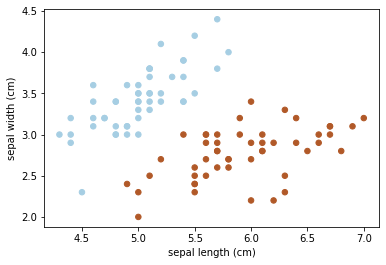

In [18]:
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=30)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

### データの分割

In [19]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.1, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(90, 4) (90,)
(10, 4) (10,)


In [20]:
# ロジスティック回帰分類器のインスタンス化
lr = cv2.ml.LogisticRegression_create()

In [21]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH) # LogisticRegression_BATCH もある
lr.setMiniBatchSize(1)
lr.setIterations(100) # 反復回数
lr.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [22]:
# ロジスティック回帰の重みとバイアス項の確認
lr.get_learnt_thetas()

array([[-0.04090133, -0.01910263, -0.16340333,  0.28743777,  0.11909772]],
      dtype=float32)

In [23]:
ret, y_pred = lr.predict(x_train)
metrics.accuracy_score(y_train, y_pred)

1.0

In [24]:
ret

0.0

In [25]:
ret, y_pred = lr.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

1.0